<a href="https://colab.research.google.com/github/Pratikshathorat96/Cardiovascular-risk-prediction/blob/main/Cardiovascular_risk_prediction_Ml_classificasion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

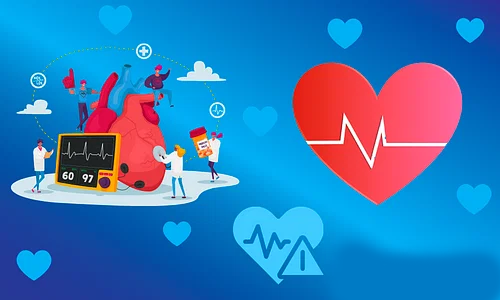

# **Project Name**    - Cardiovascular Risk Prediction.



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Name -** Pratiksha Akshay Thorat


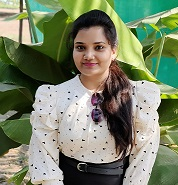

# **Project Summary -**


The project aims to develop a machine learning model for the classification of cardiovascular risk in individuals. The model will be trained on a dataset of demographic, clinical, and lifestyle variables of patients, including age, gender, blood pressure, cholesterol levels, smoking status, and family history of cardiovascular disease.

The dataset will be preprocessed to handle missing values, normalize the data, and perform feature engineering to extract relevant features for the model. Several machine learning algorithms will be evaluated, such as logistic regression, decision trees, random forests, and support vector machines, to determine the best-performing algorithm for the task.

The performance of the model will be evaluated using metrics such as accuracy, precision, recall, and F1-score. The model's interpretability will be analyzed by identifying the most important features contributing to the prediction of cardiovascular risk.

The final model will be deployed as a web application, where users can input their demographic and clinical data to obtain a personalized cardiovascular risk prediction. The project aims to provide a useful tool for healthcare professionals to identify patients at high risk of cardiovascular disease and to develop personalized prevention strategies.

# **GitHub Link -**

https://github.com/Pratikshathorat96/Cardiovascular-risk-prediction

# **Problem Statement**


Cardiovascular disease (CVD) is a leading cause of death worldwide, and early detection of individuals at high risk of developing CVD is essential for effective prevention and treatment. Traditional methods of cardiovascular risk prediction rely on risk factors such as age, gender, and blood pressure, but these methods have limitations in accurately predicting individual risk.

Machine learning algorithms have shown promise in improving the accuracy of cardiovascular risk prediction by incorporating a wider range of variables, including lifestyle factors and biomarkers. However, there is a need for a robust and reliable machine learning model that can accurately predict an individual's risk of developing CVD.

Therefore, the problem statement is to develop a machine learning model that can accurately predict an individual's risk of developing CVD by incorporating a wide range of variables, including demographic, clinical, and lifestyle factors. The model should be interpretable, reliable, and able to provide personalized risk predictions that can aid in the development of prevention strategies for high-risk individuals.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [43]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [4]:
# Load Dataset
CVD_df = pd.read_csv("/content/pdata_cardiovascular_risk (1).csv")


### Dataset First View

In [44]:
# Dataset First Look
CVD_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
row_and_column_count = CVD_df.shape
print(row_and_column_count)

(3390, 17)


In [7]:
# Total Number of rows
num_of_row = len(CVD_df.index)
print(num_of_row)

3390


In [8]:
# Total Number of columns
num_of_columns = len(CVD_df.columns)
print(num_of_columns)

17


In [9]:
# columns name
CVD_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Dataset Information

In [10]:
# Dataset Info
CVD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
df2 = CVD_df.pivot_table(index = ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      aggfunc ='size', )
print(df2)

id    age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI    heartRate  glucose  TenYearCHD
1     36   4.0        M    NO          0.0         0.0     0                1             0         212.0    168.0  98.0   29.77  72.0       75.0     0             1
2     46   1.0        F    YES         10.0        0.0     0                0             0         250.0    116.0  71.0   20.35  88.0       94.0     0             1
3     50   1.0        M    YES         20.0        0.0     0                1             0         233.0    158.0  88.0   28.26  68.0       94.0     1             1
4     64   1.0        F    YES         30.0        0.0     0                0             0         241.0    136.5  85.0   26.42  70.0       77.0     0             1
5     61   3.0        F    NO          0.0         0.0     0                1             0         272.0    182.0  121.0  32.80  85.0       65.0     1             1
         

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
print(CVD_df.isnull().sum().sum())

510


<Axes: >

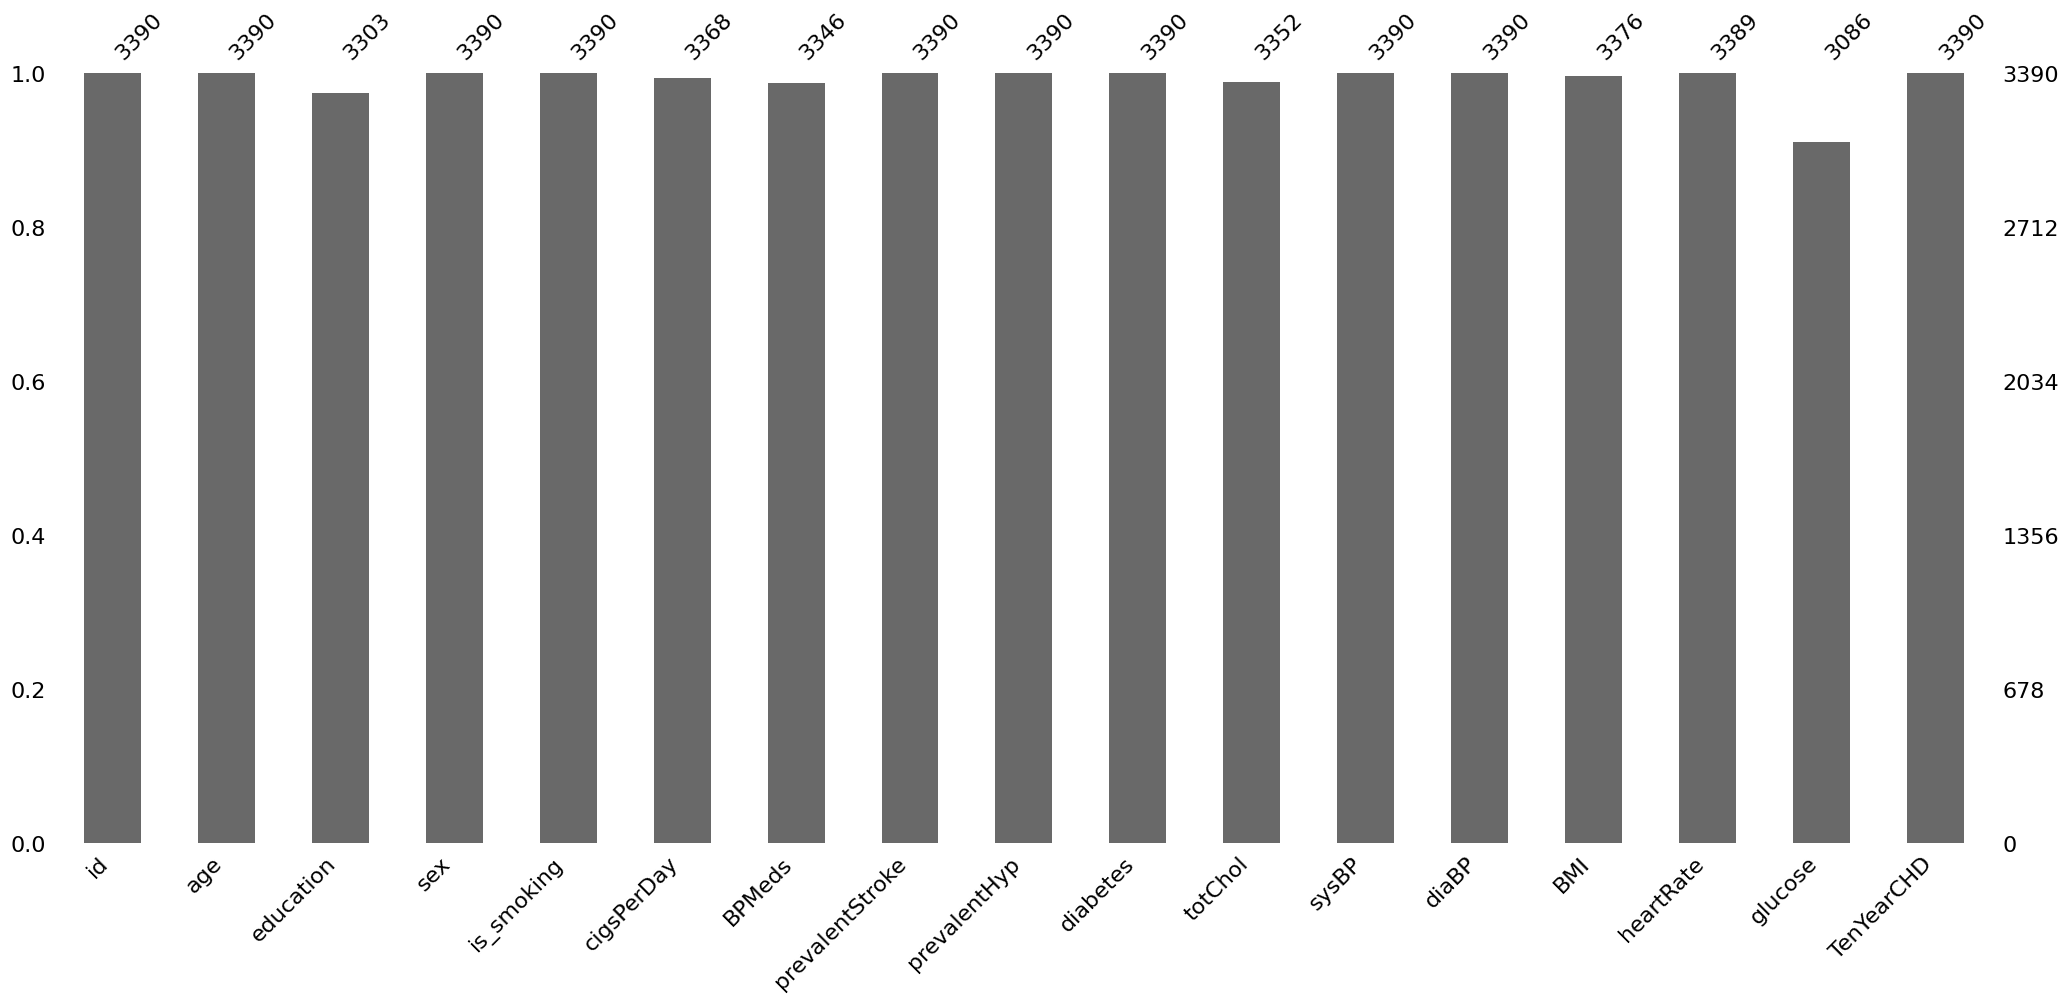

In [13]:
# Visualizing the missing values
import missingno as msno
msno.bar(CVD_df)

In [49]:
# Replacing the missing values in the categorical columns with its mode
CVD_df['education'] = CVD_df['education'].fillna(CVD_df['education'].mode()[0])
CVD_df['bp_meds'] = CVD_df['bp_meds'].fillna(CVD_df['bp_meds'].mode()[0])

In [50]:
# education distribution after mode imputation
CVD_df.education.value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [51]:
# bp_med distribution mode imputation
CVD_df.bp_meds.value_counts()

0.0    3290
1.0     100
Name: bp_meds, dtype: int64

### What did you know about your dataset?

Data set contains 3390 rows and 17 columns. There are 510 missing or null values in data columns names are
# Demographic:
* Sex: male or female ('M' or 'F')
* Age: Age of the patient (continuous- Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Education: the level of education of the patient (categorical values - 1,2,3,4)
# Behavioral:
* is_smoking: whether or not the patient is a current smoking ('yes' or 'No')
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
# Medical(history):
* BP meds: whether or not the patient was on blood pressure medication(nominal)
* Prevalent stroke: whether or not the patient had previously had a stroke(nominal)
*Prevalent Hyp: whether or not the patient was hypertensive(nominal)
* Diabetes: Whether or not the patient had diabetes(nominal)
# Medical(current):
* Tot Chol: total cholesterol level (continuous)
* Sys BP: Systgolic blood pressure (continuous )
* Dia BP: diastolic blood pressure(continuous)
* BMI: Body Mass Index (continuous)
* Heart rate: Heart rate (continuous-in medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
*Glucose: glucose level (continuous)
# Predict variable (desired target):
* 10 year risk of coronary heart disease CHD(binary:'1', means 'yes', '0' means 'NO')



## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
CVD_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
# Dataset Describe
CVD_df.describe(include = 'all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description



In total it has 17 variables and there short descriptions are as follows.
1. ID = It contains patient ID.
2. Age = age in number.
3. Sex = Gender description like male female.
4. education = the level of education of the patient.
5. is_smoking = info of whether person currently smoking or not.
6. Cigs_Per_Data = info of person cigarettes smoked per day.
7. BP_Meds = whether taking BP meds or not.
8. Prevalent Stroke =  It contains if the patient has a history of stroke.
9. Prevalent hyp = It contains if the patient has a history of hypertension.
10. Diabetes = It contains if patient has diabetes or not.
11. Tot chol = It has cholesterol measure of patient.
12. Sys BP = It has systolic BP measurement of patients.
13. Dia BP = It has Diastolic BP measurement of patients.
14. BMI = It has Body mass Index of patients.
15. Heart rate = It has Heart Rate Measure of patients.
16. Glucose = It has glucose rate of patient.
17. TenYearCHD = Person with Congenital heart defects (CHD)

# Demographic:
* Sex: male or female ('M' or 'F')
* Age: Age of the patient (continuous- Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Education: the level of education of the patient (categorical values - 1,2,3,4)
# Behavioral:
* is_smoking: whether or not the patient is a current smoking ('yes' or 'No')
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
# Medical(history):
* BP meds: whether or not the patient was on blood pressure medication(nominal)
* Prevalent stroke: whether or not the patient had previously had a stroke(nominal)
*Prevalent Hyp: whether or not the patient was hypertensive(nominal)
* Diabetes: Whether or not the patient had diabetes(nominal)
# Medical(current):
* Tot Chol: total cholesterol level (continuous)
* Sys BP: Systgolic blood pressure (continuous )
* Dia BP: diastolic blood pressure(continuous)
* BMI: Body Mass Index (continuous)
* Heart rate: Heart rate (continuous-in medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
*Glucose: glucose level (continuous)
# Predict variable (desired target):
* 10 year risk of coronary heart disease CHD(binary:'1', means 'yes', '0' means 'NO')


### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
for i in CVD_df.columns.tolist():
  print("No. of unique values in ",i,"is",CVD_df[i].nunique(),".")

No. of unique values in  id is 3390 .
No. of unique values in  age is 39 .
No. of unique values in  education is 4 .
No. of unique values in  sex is 2 .
No. of unique values in  is_smoking is 2 .
No. of unique values in  cigsPerDay is 32 .
No. of unique values in  BPMeds is 2 .
No. of unique values in  prevalentStroke is 2 .
No. of unique values in  prevalentHyp is 2 .
No. of unique values in  diabetes is 2 .
No. of unique values in  totChol is 240 .
No. of unique values in  sysBP is 226 .
No. of unique values in  diaBP is 142 .
No. of unique values in  BMI is 1259 .
No. of unique values in  heartRate is 68 .
No. of unique values in  glucose is 132 .
No. of unique values in  TenYearCHD is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [46]:
# Renaming the columns
CVD_df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [47]:
# Defining 3 lists containing the column names of
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables
# This is defined based on the number of unique values for each attribute

dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

In [48]:
# Encoding the binary columns

CVD_df['sex'] = np.where(CVD_df['sex'] == 'M',1,0)
CVD_df['is_smoking'] = np.where(CVD_df['is_smoking'] == 'YES',1,0)


### What all manipulations have you done and insights you found?

* The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

* The dataset provides the patients’ information. Each attribute is a potential risk factor. There are demographic, behavioral, and medical risk factors.
* The dataset contains 3390 rows and 16 columns. There are no duplicate records, and contains 510 missing values.
* There are a total of 510 missing values in the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
Which Gender is prone to coronary heart disease?

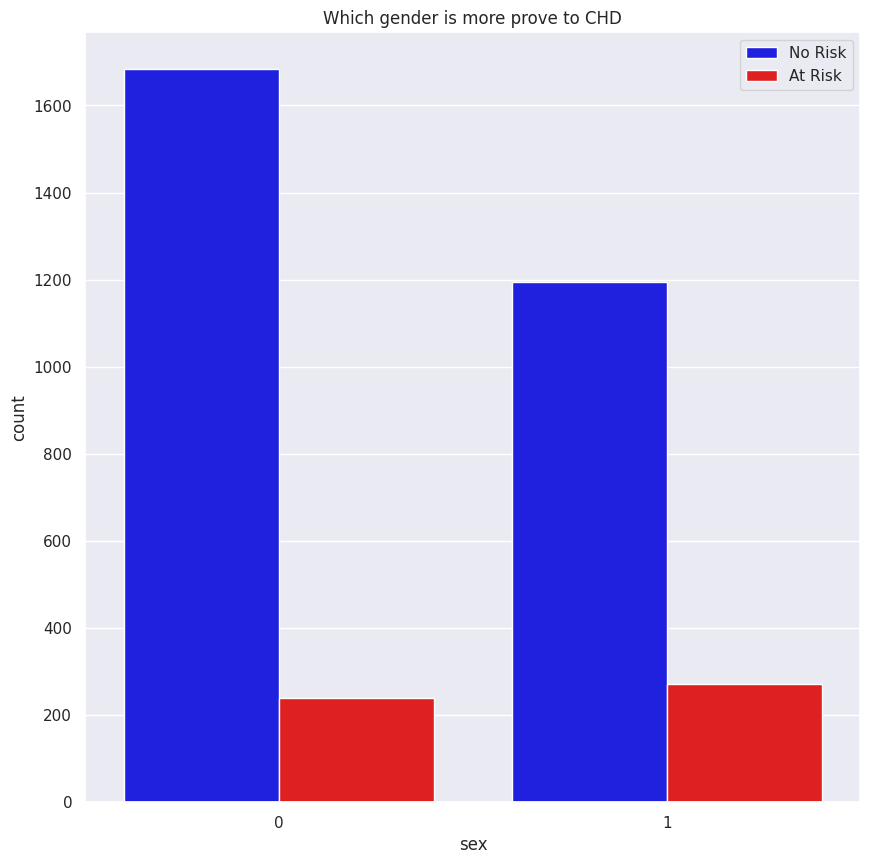

In [58]:
# Chart - 1 visualization code

my_palette = {0:'blue',1:'red'}
# 10 -year risk of coronary heart disease CHD (binary: "1",means "yes","0"means "no")
plt.figure(figsize=(10,10))
sns.countplot(x = CVD_df['sex'], hue = CVD_df['ten_year_chd'], palette = my_palette)
plt.title("Which gender is more prove to CHD")
plt.legend(['No Risk', 'At Risk'])
plt.show()

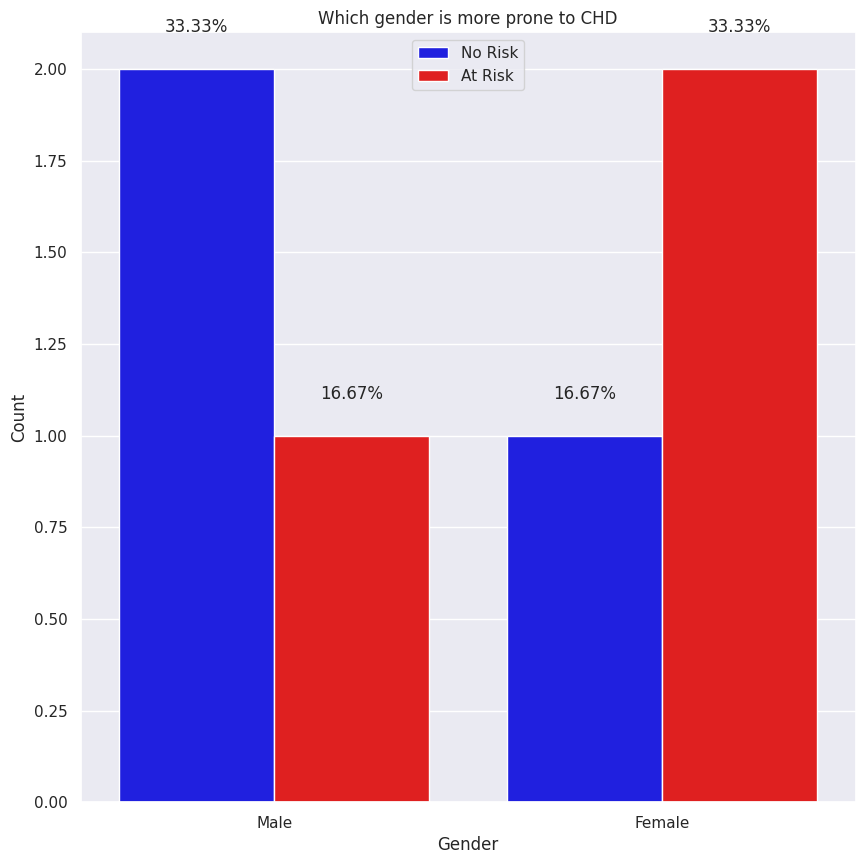

In [59]:
# Sample dataset
CVD_df = pd.DataFrame({'sex': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male'],
                       'ten_year_chd': [0, 1, 0, 1, 1, 0]})

my_palette = {0: 'blue', 1: 'red'}

plt.figure(figsize=(10, 10))
ax = sns.countplot(x=CVD_df['sex'], hue=CVD_df['ten_year_chd'], palette=my_palette)

# Adding labels to the bars
total = len(CVD_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height/total:.2%}', ha="center")

plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk', 'At Risk'])
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [22]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [23]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [24]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [25]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [26]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [27]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [28]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [29]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [30]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [31]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [32]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [33]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [34]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [35]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***